In [1]:
#YUKLAH KITA MULAI

#baca dataset
!pip install opendatasets --upgrade
import opendatasets as od

#Visualisasi data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing data
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Kita train lah modelnya
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import Callback

In [2]:
od.download("https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: avrahaem
Your Kaggle Key: ··········


100%|██████████| 721k/721k [00:00<00:00, 73.4MB/s]

In [3]:
df_train = pd.read_csv('/content/emotions-dataset-for-nlp/train.txt', sep=';', names=["sentence", "emotion"])
df_val = pd.read_csv('/content/emotions-dataset-for-nlp/val.txt',sep=';',names=["sentence", "emotion"])
df_test = pd.read_csv('/content/emotions-dataset-for-nlp/test.txt',sep=';',names=["sentence", "emotion"])

print(df_train)
print(df_val)
print(df_test)

                                                sentence  emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]
                                               sentence  emotion
0     im feeling quite sad and sorry for myself but ...  sadness
1     i feel like i am still looking at a blank canv

In [4]:
df = pd.concat([df_train, df_val])
df

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


Text(0, 0.5, 'total')

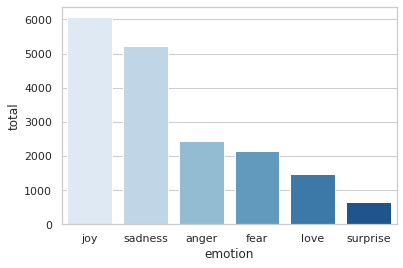

In [5]:
sns.set_theme(style='whitegrid')
sns.barplot(x = df['emotion'].value_counts().index, y = df['emotion'].value_counts(), palette = "Blues")

plt.xlabel('emotion')
plt.ylabel('total')

In [6]:
category = pd.get_dummies(df.emotion)
df_baru = pd.concat([df, category], axis = 1)
df_baru = df_baru.drop(columns = 'emotion')
df_baru

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,0,0,0,0,1,0
1996,i constantly worry about their fight against n...,0,0,1,0,0,0
1997,i feel its important to share this info for th...,0,0,1,0,0,0
1998,i truly feel that if you are passionate enough...,0,0,1,0,0,0


In [7]:
the_sentence = df_baru['sentence'].values
label = df_baru[['anger',	'fear',	'joy',	'love',	'sadness',	'surprise']].values

In [8]:
sentence_latih, sentence_test, label_latih, label_test = train_test_split(the_sentence, label, test_size = 0.2, random_state = 42)

In [9]:
token = Tokenizer(num_words = 5000, oov_token = 'ntah')
token.fit_on_texts(sentence_latih)
token.fit_on_texts(sentence_test)

sekuens_latih = token.texts_to_sequences(sentence_latih)
sekuens_test = token.texts_to_sequences(sentence_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim = 5000, output_dim = 100),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [12]:
history = model.fit(padded_latih, label_latih, epochs=100, validation_data=(padded_test, label_test), callbacks=[callbacks])

Epoch 1/100
450/450 [==============================] - 28s 57ms/step - loss: 1.6007 - accuracy: 0.3422 - val_loss: 1.3114 - val_accuracy: 0.4650
Epoch 2/100
450/450 [==============================] - 24s 54ms/step - loss: 1.1322 - accuracy: 0.5754 - val_loss: 0.7312 - val_accuracy: 0.7647
Epoch 3/100
450/450 [==============================] - 23s 52ms/step - loss: 0.7645 - accuracy: 0.6905 - val_loss: 0.5428 - val_accuracy: 0.8108
Epoch 4/100
450/450 [==============================] - 24s 53ms/step - loss: 0.6329 - accuracy: 0.7341 - val_loss: 0.4972 - val_accuracy: 0.8222
Epoch 5/100
450/450 [==============================] - 23s 51ms/step - loss: 0.5890 - accuracy: 0.7547 - val_loss: 0.5775 - val_accuracy: 0.8289
Epoch 6/100
450/450 [==============================] - 23s 50ms/step - loss: 0.5441 - accuracy: 0.7690 - val_loss: 0.5075 - val_accuracy: 0.8375
Epoch 7/100
450/450 [==============================] - 23s 51ms/step - loss: 0.4908 - accuracy: 0.7842 - val_loss: 0.4587 - val_ac

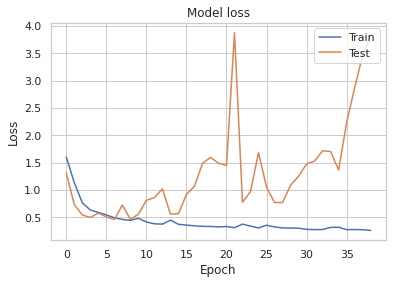

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

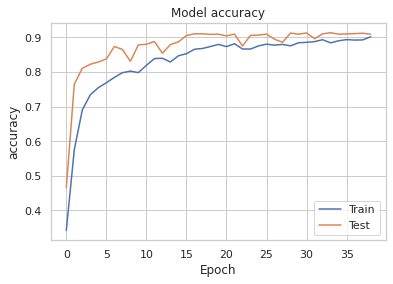

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()